# 🏦 Lending Club - Análisis de Datos Historico

# 📑 Introducción

**Lending Club** es una compañía estadounidense de préstamo entre particulares, con sede en San Francisco, Estados Unidos de América. Fue el primer sitio de préstamo entre particulares en registrar sus productos como valores con la Securities and Exchange Commission (SEC), y ofrecer un servicio de préstamos en el mercado secundario. **Lending Club** es pionera de servicios de préstamos entre particulares.

# 💾 Data Set

La base de datos usada se extrajo directamente desde Kaggle:

**Source:** Lending Club historical loan data (2007–2020)
- [Dataset link](https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1)

A continuación, se describirá las variables más importante de la base de datos usada para el análisis:

| LoanStatNew | Descripción |
|-------------|-------------|
| **loan_amnt** | El monto listado del préstamo solicitado por el prestatario. Si en algún momento el departamento de crédito reduce el monto, esto se reflejará en este valor. |
| **term** | El número de pagos del préstamo. Los valores están en meses y pueden ser 36 o 60. |
| **int_rate** | Tasa de interés del préstamo. |
| **installment** | Pago mensual que debe realizar el prestatario si el préstamo se otorga. |
| **grade** | Calificación del préstamo asignada por Lending Club (LC). |
| **sub_grade** | Subcalificación del préstamo asignada por LC. |
| **emp_title** | Título del empleo proporcionado por el prestatario al solicitar el préstamo. |
| **emp_length** | Tiempo de empleo en años. Valores posibles de 0 a 10, donde 0 significa menos de un año y 10 significa diez o más años. |
| **home_ownership** | Estado de propiedad de la vivienda proporcionado por el prestatario durante el registro o obtenido del informe crediticio. Valores: RENT (alquila), OWN (propia), MORTGAGE (hipotecada), OTHER (otro). |
| **annual_inc** | Ingreso anual autoinformado por el prestatario durante el registro. |
| **verification_status** | Indica si el ingreso fue verificado por LC, no verificado o si se verificó la fuente del ingreso. |
| **issue_d** | Mes en que se financió el préstamo. |
| **loan_status** | Estado actual del préstamo. |
| **purpose** | Categoría proporcionada por el prestatario para la solicitud del préstamo. |
| **title** | Título del préstamo proporcionado por el prestatario. |
| **zip_code** | Los primeros 3 números del código postal proporcionado por el prestatario en la solicitud del préstamo. |
| **addr_state** | Estado proporcionado por el prestatario en la solicitud del préstamo. |
| **dti** | Ratio calculado como los pagos totales mensuales de deuda del prestatario sobre las obligaciones de deuda totales (excluyendo hipoteca y el préstamo solicitado a LC), dividido por el ingreso mensual autoinformado del prestatario. |
| **earliest_cr_line** | Mes en que se abrió la línea de crédito más antigua reportada del prestatario. |
| **open_acc** | Número de líneas de crédito abiertas en el historial crediticio del prestatario. |
| **pub_rec** | Número de registros públicos negativos (derogatorios). |
| **revol_bal** | Saldo total de crédito revolvente. |
| **revol_util** | Porcentaje de utilización de línea de crédito revolvente, es decir, cuánto crédito está usando el prestatario respecto al total disponible. |
| **total_acc** | Número total de líneas de crédito actualmente en el historial crediticio del prestatario. |
| **initial_list_status** | Estado inicial de listado del préstamo. Posibles valores: W, F. |
| **application_type** | Indica si la solicitud de préstamo es individual o conjunta (dos co-prestatarios). |
| **mort_acc** | Número de cuentas hipotecarias. |
| **pub_rec_bankruptcies** | Número de quiebras registradas en registros públicos. |


# 🗂 Imports y Carga de los Data Sets
Considere que:

* El Notebook (.ipynb) se ejecutó en una instancia local usando Visual Studio Code y Anaconda.

* La base de datos y el diccionario usado para este analisis deben estar en la misma carpeta del Notebook (.ipynb).

* La base de datos es una archivo guardado con la extensión .gzip a pesar de NO ser un archivo comprimido. Se usará el comando *.read_csv* para cargar la base de datos.

## 🐍 Imports necesarios para el análisis...

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

from matplotlib.ticker import StrMethodFormatter

## ⬇️ Carga de las base de datos...

In [ ]:
df = pd.read_csv(
    "Loan_status_2007-2020Q3.gzip", 
    low_memory=False
    )

df1 = pd.read_excel(
    "LCDataDictionary.xlsx"
    )

# Análisis descriptivo y exploratorio

Lo primero, es verificar la estructura del Data Set principal y las columnas existentes:

In [46]:
df.head(5)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [48]:
# Limpieza de la columna 'Unnamed: 0':
df = df.drop(['Unnamed: 0'], axis=1)

df.columns.tolist()

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verificat

## 💰 Distribución de préstamos por estado de crédito

De las columnas, la que importa para analizar la distribución del prestamo según el estado crediticio, es la columna *'loan_status'*.


Conteo de las variables introducidas en esta columna:

In [49]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: count, dtype: int64

🪙 Separación del DataFrame en:

* 👍 Credito Saldado donde se cumple 'Fully Paid'
* 💵 Credito Activo donde se cumple 'Issued' + 'Current' + 'Late (31-120 days)' + 'Late (16-30 days)' + 'In Grace Period'
* 🏦 Credito Inactivo donde se cumple 'Charged Off' + 'Default' 
* ❌ Omisión de las variables 'Does not meet the credit policy. Status:Fully Paid' y 'Does not meet the credit policy. Status:Charged Off'.

In [50]:
df_saldado = df[df['loan_status'] == 'Fully Paid']

creditos_activos = ['Current', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Issued']
df_activo = df[df['loan_status'].isin(creditos_activos)]

creditos_inactivos = ['Charged Off', 'Default']
df_inactivo = df[df['loan_status'].isin(creditos_inactivos)]

creditos_omitidos = ['Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off']
df_omitido = df[df['loan_status'].isin(creditos_omitidos)]

In [51]:
df_saldado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1497783 entries, 0 to 2925491
Columns: 141 entries, id to debt_settlement_flag
dtypes: float64(106), object(35)
memory usage: 1.6+ GB


In [52]:
df_activo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1061979 entries, 230718 to 2925474
Columns: 141 entries, id to debt_settlement_flag
dtypes: float64(106), object(35)
memory usage: 1.1+ GB


In [53]:
df_inactivo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362981 entries, 1 to 2925492
Columns: 141 entries, id to debt_settlement_flag
dtypes: float64(106), object(35)
memory usage: 393.2+ MB


In [54]:
df_omitido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2749 entries, 39787 to 42535
Columns: 141 entries, id to debt_settlement_flag
dtypes: float64(106), object(35)
memory usage: 3.0+ MB


La suma del Index de los 4 dataframes generados a partir del original es de 2,925,492 de entradas...

Gráficos que sirven para reflejar la distribución de los creditos según el estado del crédito *'loan_status'*:

* *Nótese que se considera los Creditos en estado 'Charged Off' y 'Default' como Inactivos, puesto que **Lending Club** considera estas deuda imposibles de cobrar a pesar que su deuda sigue existiendo.*


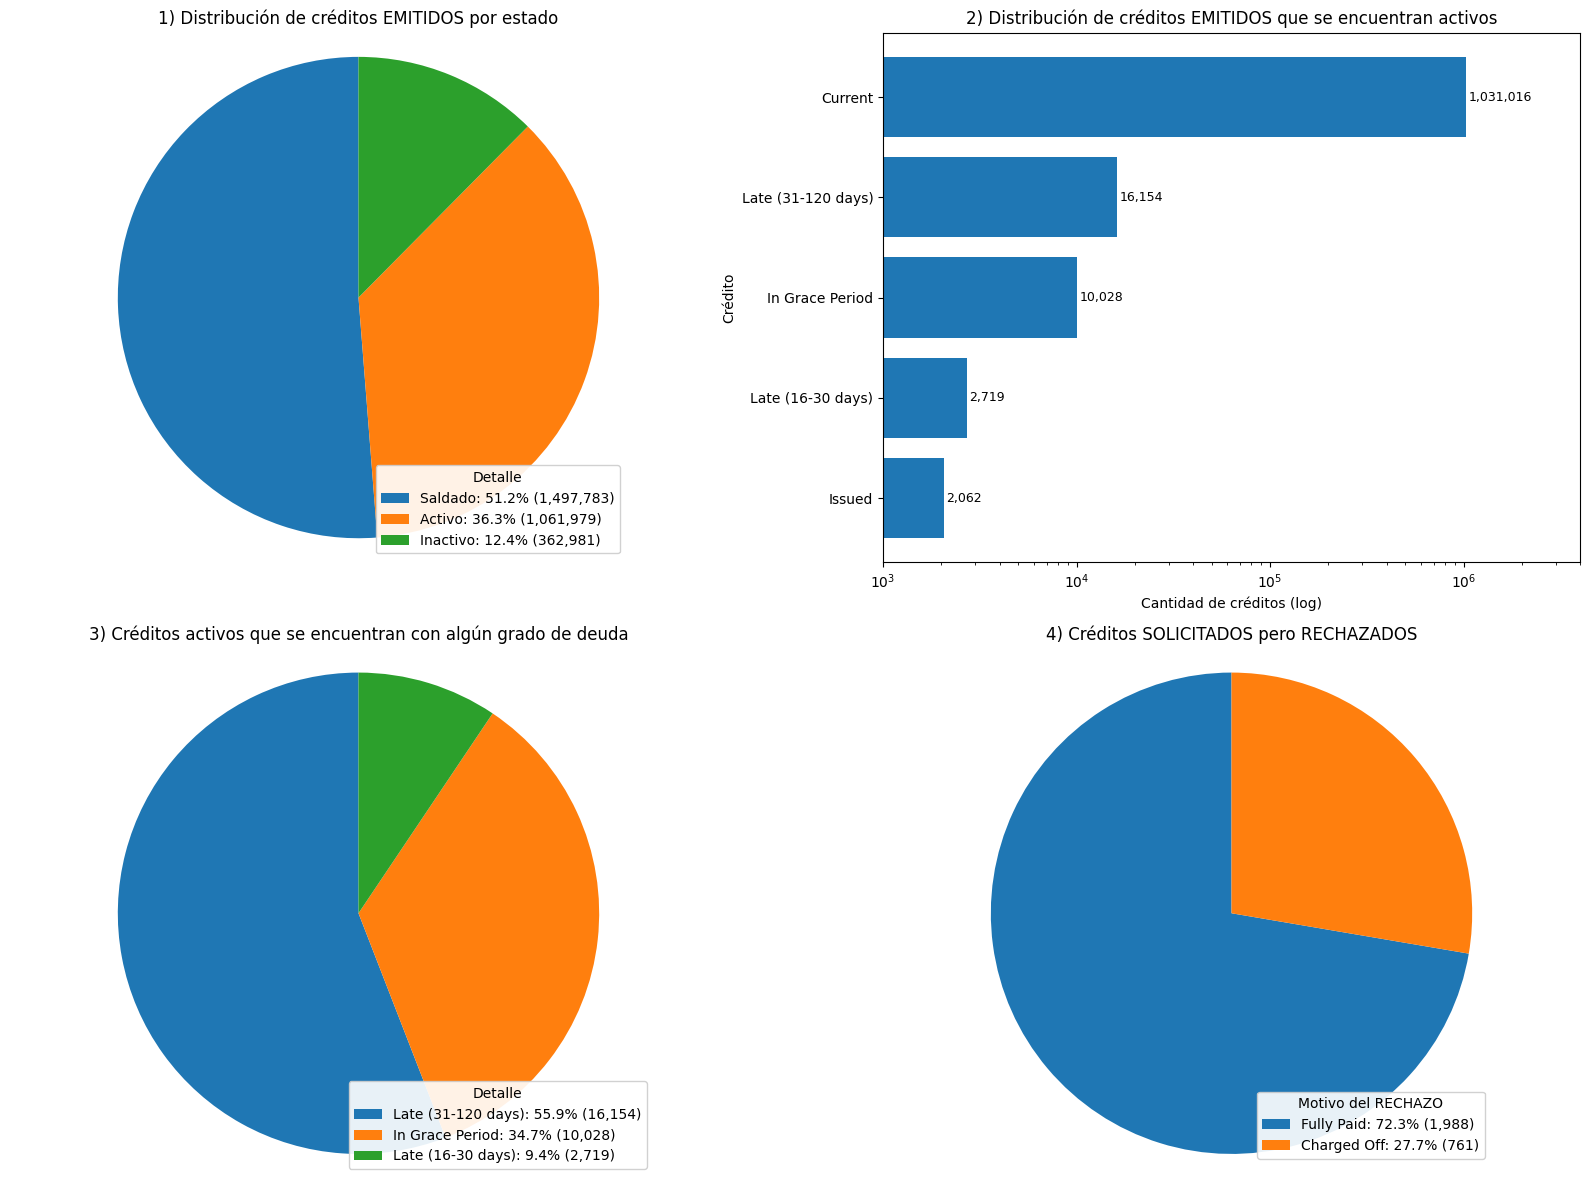

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
(ax1, ax2), (ax3, ax4) = axes

## --------------------------------------------------------------- ##
# 1) Torta: distribución entre df_saldado, df_activo y df_inactivo
dist_grupos = pd.Series({
    "Saldado": len(df_saldado),
    "Activo": len(df_activo),
    "Inactivo": len(df_inactivo)
})

# Sin labels en la torta y sin porcentajes dibujados en la torta
wedges, _ = ax1.pie(
    dist_grupos.values,
    startangle=90
)

ax1.set_title("1) Distribución de créditos EMITIDOS por estado")
ax1.axis("equal")

# Box flotante sobre la torta: color + categoría + porcentaje + valor
total = dist_grupos.sum()
legend_labels = [
    f"{label}: {value/total:.1%} ({value:,})"
    for label, value in dist_grupos.items()
]

ax1.legend(
    wedges,
    legend_labels,
    title="Detalle",
    loc="center",                 # centrado dentro del eje (flotante)
    bbox_to_anchor=(0.7, 0.1),
    frameon=True,
    fancybox=True,
    framealpha=0.9
)

## --------------------------------------------------------------- ##
# 2) Barra horizontal (log): loan_status en df_activo:
# 2) Barra horizontal (log): loan_status en df_activo
status_activo = df_activo["loan_status"].value_counts().sort_values()

bars = ax2.barh(status_activo.index, status_activo.values)
ax2.set_xscale("log")
ax2.set_title("2) Distribución de créditos EMITIDOS que se encuentran activos")
ax2.set_xlabel("Cantidad de créditos (log)")
ax2.set_ylabel("Crédito")

# Valor al final de cada barra
for bar in bars:
    v = int(bar.get_width())
    y = bar.get_y() + bar.get_height() / 2
    ax2.text(v * 1.03, y, f"{v:,}", va="center", ha="left", fontsize=9)

# Ajuste manual del rango del eje X (modificable)
x_min = 1e3
x_max = 4e6
ax2.set_xlim(x_min, x_max)


## --------------------------------------------------------------- ##
# 3) Torta: loan_status en df_activo omitiendo Current e Issued (sin labels en torta + box flotante)
filtro = ~df_activo["loan_status"].isin(["Current", "Issued"])
status_activo_filtrado = df_activo.loc[filtro, "loan_status"].value_counts()

if status_activo_filtrado.empty:
    ax3.text(0.5, 0.5, "Sin datos luego de omitir\n'Current' e 'Issued'",
             ha="center", va="center")
    ax3.set_title("3) Créditos activos que se encuentran con algún grado de deuda")
    ax3.axis("off")
else:
    wedges3, _ = ax3.pie(
        status_activo_filtrado.values,
        startangle=90
    )
    ax3.set_title("3) Créditos activos que se encuentran con algún grado de deuda")
    ax3.axis("equal")

    total3 = status_activo_filtrado.sum()
    legend_labels3 = [
        f"{label}: {value/total3:.1%} ({value:,})"
        for label, value in status_activo_filtrado.items()
    ]

    ax3.legend(
        wedges3,
        legend_labels3,
        title="Detalle",
        loc="center",
        bbox_to_anchor=(0.7, 0.1),
        frameon=True,
        fancybox=True,
        framealpha=0.9
    )

## --------------------------------------------------------------- ##
# 4) Torta: loan_status en df_omitido (sin labels en torta + box flotante)
status_omitido = df_omitido["loan_status"].value_counts()

# Resumir labels largos
map_labels = {
    "Does not meet the credit policy. Status:Fully Paid": "Fully Paid",
    "Does not meet the credit policy. Status:Charged Off": "Charged Off"
}
status_omitido.index = [map_labels.get(x, x) for x in status_omitido.index]

wedges4, _ = ax4.pie(
    status_omitido.values,
    startangle=90
)
ax4.set_title("4) Créditos SOLICITADOS pero RECHAZADOS")
ax4.axis("equal")

total4 = status_omitido.sum()
legend_labels4 = [
    f"{label}: {value/total4:.1%} ({value:,})"
    for label, value in status_omitido.items()
]

ax4.legend(
    wedges4,
    legend_labels4,
    title="Motivo del RECHAZO",
    loc="center",
    bbox_to_anchor=(0.7, 0.1),
    frameon=True,
    fancybox=True,
    framealpha=0.9
)

plt.tight_layout()
plt.show()




* Observaciones:
    * A la fecha del 2020, más de la mitad de los creditos solicitados se encuentran saldados o con **deuda cero**.

    * Por otro lado, el 36% de los creditos registrados en *Lending Club* se consideran créditos vigente o insoluto.
        * De este último punto, se aprecia que la mayoria de los cliente con créditos vigente se encuentran sin deuda por atraso.
        * De aquelos quienes acumulan alguna deuda por atraso, el 55% - *Late (31-120 days)* - se encuentran cerca de ingresar al estado *Charge-Off* o *Default*.
    
    * El 12% de los céditos emitidos a la fecha del 2020, se encuentran en un estado incobrable, o *Charge-Off* o *Default*.

## 📅 Gráfico de evolución de credítos emitidos y solicitados en función de la fecha de emisión del mismo...

De las columnas, la que importa para analizar la distribución del prestamo según el año de emisión, es la columna *'issue_d'*.

In [56]:
df['issue_d'].unique()

array(['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010',
       'Sep-2010', 'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010',
       'Apr-2010', 'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009',
       'Nov-2009', 'Oct-2009', 'Sep-2009', 'Aug-2009', 'Jul-2009',
       'Jun-2009', 'May-2009', 'Apr-2009', 'Mar-2009', 'Feb-2009',
       'Jan-2009', 'Dec-2008', 'Nov-2008', 'Oct-2008', 'Sep-2008',
       'Aug-2008', 'Jul-2008', 'Jun-2008', 'May-2008', 'Apr-2008',
       'Mar-2008', 'Feb-2008', 'Jan-2008', 'Dec-2007', 'Nov-2007',
       'Oct-2007', 'Sep-2007', 'Aug-2007', 'Jul-2007', 'Jun-2007', nan,
       'Dec-2013', 'Nov-2013', 'Oct-2013', 'Sep-2013', 'Aug-2013',
       'Jul-2013', 'Jun-2013', 'May-2013', 'Apr-2013', 'Mar-2013',
       'Feb-2013', 'Jan-2013', 'Dec-2012', 'Nov-2012', 'Oct-2012',
       'Sep-2012', 'Aug-2012', 'Jul-2012', 'Jun-2012', 'M

In [57]:
# Preparación de la columna 'issue_d'
dfs = [df_saldado, df_activo, df_inactivo, df_omitido]

for d in dfs:
    d.loc[:, "issue_d"] = pd.to_numeric(
        d["issue_d"].str[-4:],
        errors="coerce"
    ).astype("Int64")

In [58]:
df_omitido['issue_d'].unique()

array([2010, 2009, 2008, 2007], dtype=object)

In [59]:
# Generación de dataframe auxiliar de créditos emitidos:
df_solicitado = pd.concat([df_saldado, df_activo, df_inactivo], axis=0, ignore_index=True)


In [60]:
df_solicitado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922743 entries, 0 to 2922742
Columns: 141 entries, id to debt_settlement_flag
dtypes: float64(106), object(35)
memory usage: 3.1+ GB


In [61]:
df_omitido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2749 entries, 39787 to 42535
Columns: 141 entries, id to debt_settlement_flag
dtypes: float64(106), object(35)
memory usage: 3.0+ MB


In [62]:
# Año extraído desde issue_d en cada dataframe
anio_solicitado = pd.to_numeric(df_solicitado["issue_d"], errors="coerce")
anio_omitido = pd.to_numeric(df_omitido["issue_d"], errors="coerce")

# Tabla final: filas = año, columnas = conteos por dataframe + total
tabla_creditos_year = pd.DataFrame({
    "df_solicitado": anio_solicitado.value_counts(),
    "df_omitido": anio_omitido.value_counts()
}).fillna(0).astype(int).sort_index()

tabla_creditos_year["total"] = (
    tabla_creditos_year["df_solicitado"] + tabla_creditos_year["df_omitido"]
)
tabla_creditos_year.index.name = "anio"

tabla_creditos_year

,df_solicitado,df_omitido,total
anio,,,
2007,251,352,603
2008,1562,831,2393
2009,4716,565,5281
2010,11536,1001,12537
2011,21721,0,21721
2012,53367,0,53367
2013,134814,0,134814
2014,235629,0,235629
2015,421095,0,421095


Gráfico de barra mostrando la distribución de créditos emitidos por año entre el 2007 al Q3 del 2020...

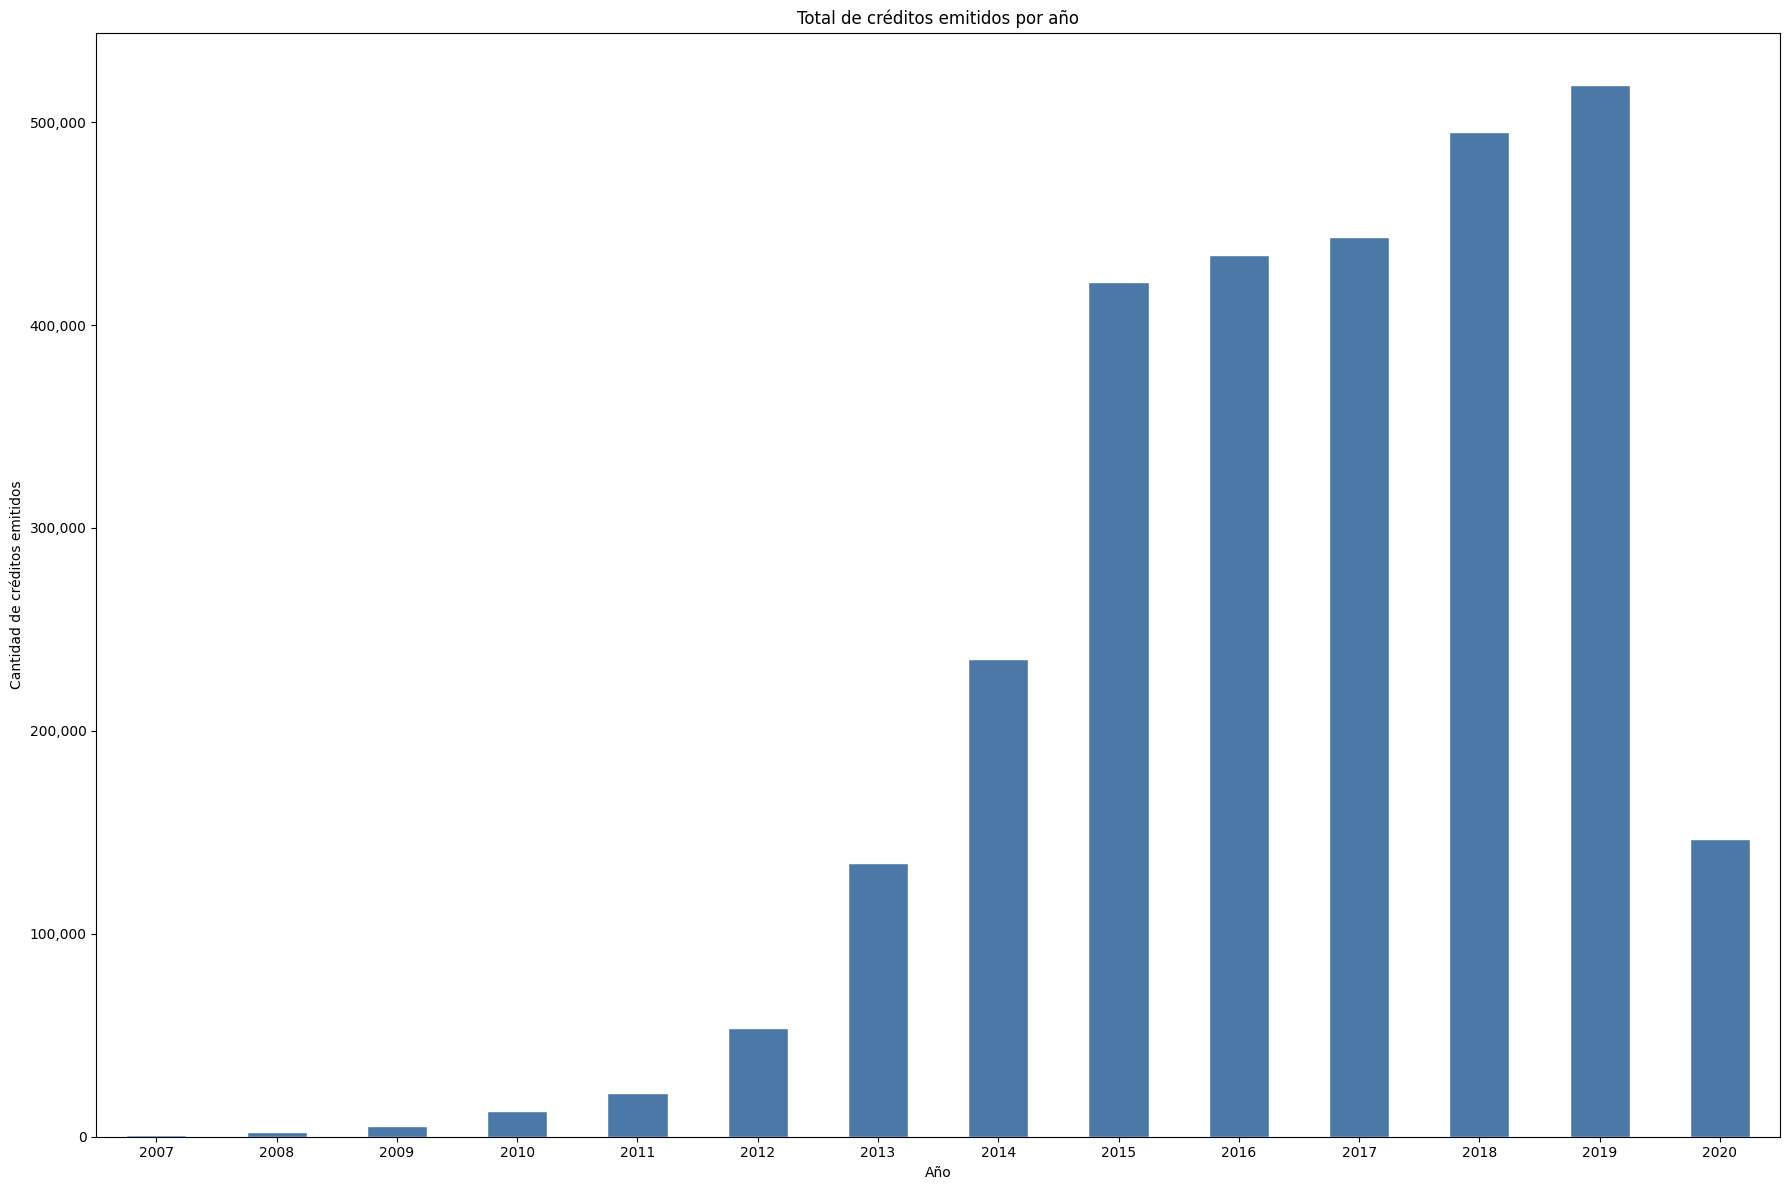

In [ ]:
# Asegurar orden por año
tabla_creditos_year = tabla_creditos_year.sort_index()

# Gráfico de barras para la columna total
ax = tabla_creditos_year["total"].plot(
    kind="bar",
    figsize=(18, 12),
    color="#4C78A8",
    edgecolor="white"
)

ax.set_title("Total de créditos emitidos por año")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad de créditos emitidos")

# Formato eje Y con separador de miles
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

De la base de datos, se puede inferir un crecimiento sostenido en la emisión de créditos por año, partiendo con un mínimo histórico en el 2007 - coincidiendo con el año de fundación del grupo Lending Club en el 2006 - hasta su pico en el 2019.

Resulta interesante ver el comportamiento en el 2020, puesto que los creditos emitidos en esa fecha no llegan a representar el 33% de los créditos emitidos en el año anterior. 

Una posible hipótesis que explicaría sería:

* La pandemía del COVID-19: Recordar que la pandemía se empezó a propagar a inicios del 2020, lo cual derivó a una temprana caída en el índice de consumo en Estados Unidos. Esto implicó una baja en la producción de bienes y servicios no relacionados al terreno de la salud, lo cual provocó un estancamiento repentino en la economía norteamericana. Si bien, uno puede pensar que esto debió propiciar la emisión de créditos, también es importante destacar que en este año en particular surgieron medidas de ayudas económicas para combatir el impacto de la pandemía.
    * Otro punto a destacar, y que puede estar vinculado a esta última hipótesis, es una posible reserva de potenciales clientes de Lending Club a solicitar créditos ese año, o un salto en los créditos solicitados pero rechazados por la organización ante la incertidumbre de la pandemía y su efecto en los gastos y poder adquisitivo de sus clientes.

Distribucion de la cantidad solicitado por credito agrupado por año según su fecha de solicitud...

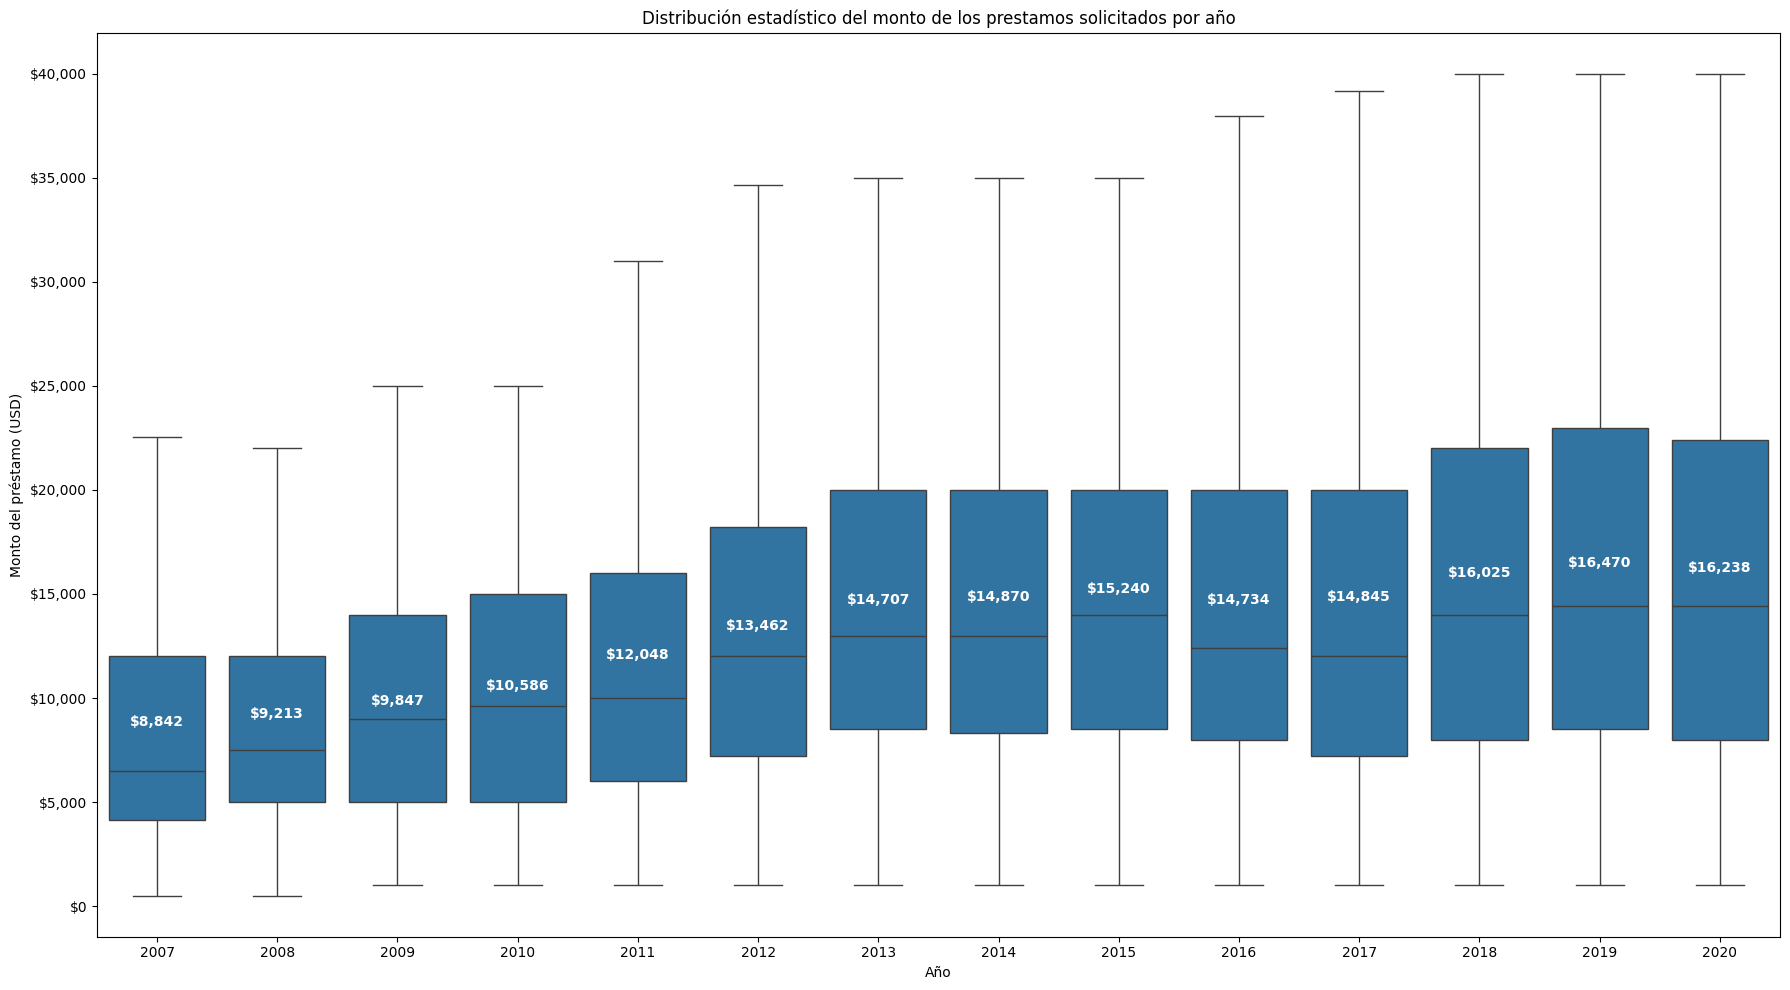

In [64]:
# Datos limpios
df_box = df_solicitado.dropna(subset=['issue_d', 'loan_amnt']).copy()
df_box['issue_d'] = df_box['issue_d'].astype(int)

plt.figure(figsize=(18, 10))
ax = sns.boxplot(
    data=df_box,
    x='issue_d',
    y='loan_amnt',
    showfliers=False,
    showmeans=False,
    meanprops={
        "marker": "D",
        "markerfacecolor": "white",
        "markeredgecolor": "black",
        "markersize": 6
    }
)

# Promedio por año (en el mismo orden del eje X)
means = df_box.groupby('issue_d')['loan_amnt'].mean().sort_index()

# Texto del promedio dentro de cada boxplot (blanco)
for i, (year, mean_val) in enumerate(means.items()):
    ax.text(
        i, mean_val, f'${mean_val:,.0f}',
        ha='center', va='center',
        color='white', fontsize=10, fontweight='bold'
    )

plt.title("Distribución estadístico del monto de los prestamos solicitados por año")
plt.xlabel("Año")
plt.ylabel("Monto del préstamo (USD)")
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.tight_layout()
plt.show()


Se puede observar que hay un ligero crecimiento en la medía de los montos de los créditos solicitados. Sin embargo, este crecimiento ocurre dentro del mismo de los límites superios e inferiores respecto al año anterior. De todos modos, se puede apreciar que ya para el año 2020, la media era de $16,238, representado un poco menos del doble de lo que se solicitaba en el año 2007, con $8,842.

* Esto puede ser a causa del encarecimiento inflacionario del costo de vida en Estados Unidos, lo cual hace que, por ejemplo, para adquirir un vehículo se necesite más recursos económicos para poder costearlo.

## 🚶 Distribución de la Cartera de Cliente

De las columnas, la que importa para analizar la distribución de la cartera de cliente son:

* *'emp_title'*
* *'emp_length'*
* *'annual_inc'*
* *'addr_state'*
* *'application_type'*

Agrupación de 'Registered Nurse' y 'RN' como una única variable 'Registered Nurse':


In [65]:
for d in [df_saldado, df_activo, df_inactivo, df_omitido]:
    d.loc[:, 'emp_title'] = d['emp_title'].replace({'RN': 'Registered Nurse'})

Capitalización de las variables en la columna 'emp_title' (ej, 'owner' y 'Owner'):

In [66]:
for d in [df_saldado, df_activo, df_inactivo, df_omitido]:
    d.loc[:, 'emp_title'] = d['emp_title'].str.title()

#### ... Los 10 empleos que más han solicitado créditos, categorizando aquellos si esos creditos están... Saldado, Activo, e Inactivo: 

Tabla auxiliar con el contéo de solicitudes de creditos solicitados separado por el estado en que se encuentra dichos créditos:

In [67]:
tabla_emp = (
    pd.concat([
        df_saldado['emp_title'].value_counts().rename('Créditos Saldado'),
        df_activo['emp_title'].value_counts().rename('Créditos Activos'),
        df_inactivo['emp_title'].value_counts().rename('Créditos Inactivos')
    ], axis=1)
    .fillna(0)
    .astype(int)
    .reset_index()
    .rename(columns={'index': 'emp_title'})
)

tabla_emp['Créditos Totales'] = (
    tabla_emp['Créditos Saldado'] +
    tabla_emp['Créditos Activos'] +
    tabla_emp['Créditos Inactivos']
)

tabla_emp.head(10).sort_values('Créditos Totales', ascending=False)

,emp_title,Créditos Saldado,Créditos Activos,Créditos Inactivos,Créditos Totales
0,Teacher,30271,21998,6503,58772
1,Manager,27517,18673,7635,53825
2,Registered Nurse,24063,16846,5230,46139
3,Owner,17592,12037,5877,35506
4,Driver,12258,10011,4561,26830
5,Supervisor,11952,7690,3333,22975
6,Sales,11307,6827,3228,21362
8,Office Manager,8573,6630,1981,17184
7,Project Manager,8858,6012,1678,16548
9,General Manager,7550,5953,2198,15701


Gráfico de barra apilada agrupando la información anterio para el TOP 10 de empleos con creditos más solicitados:

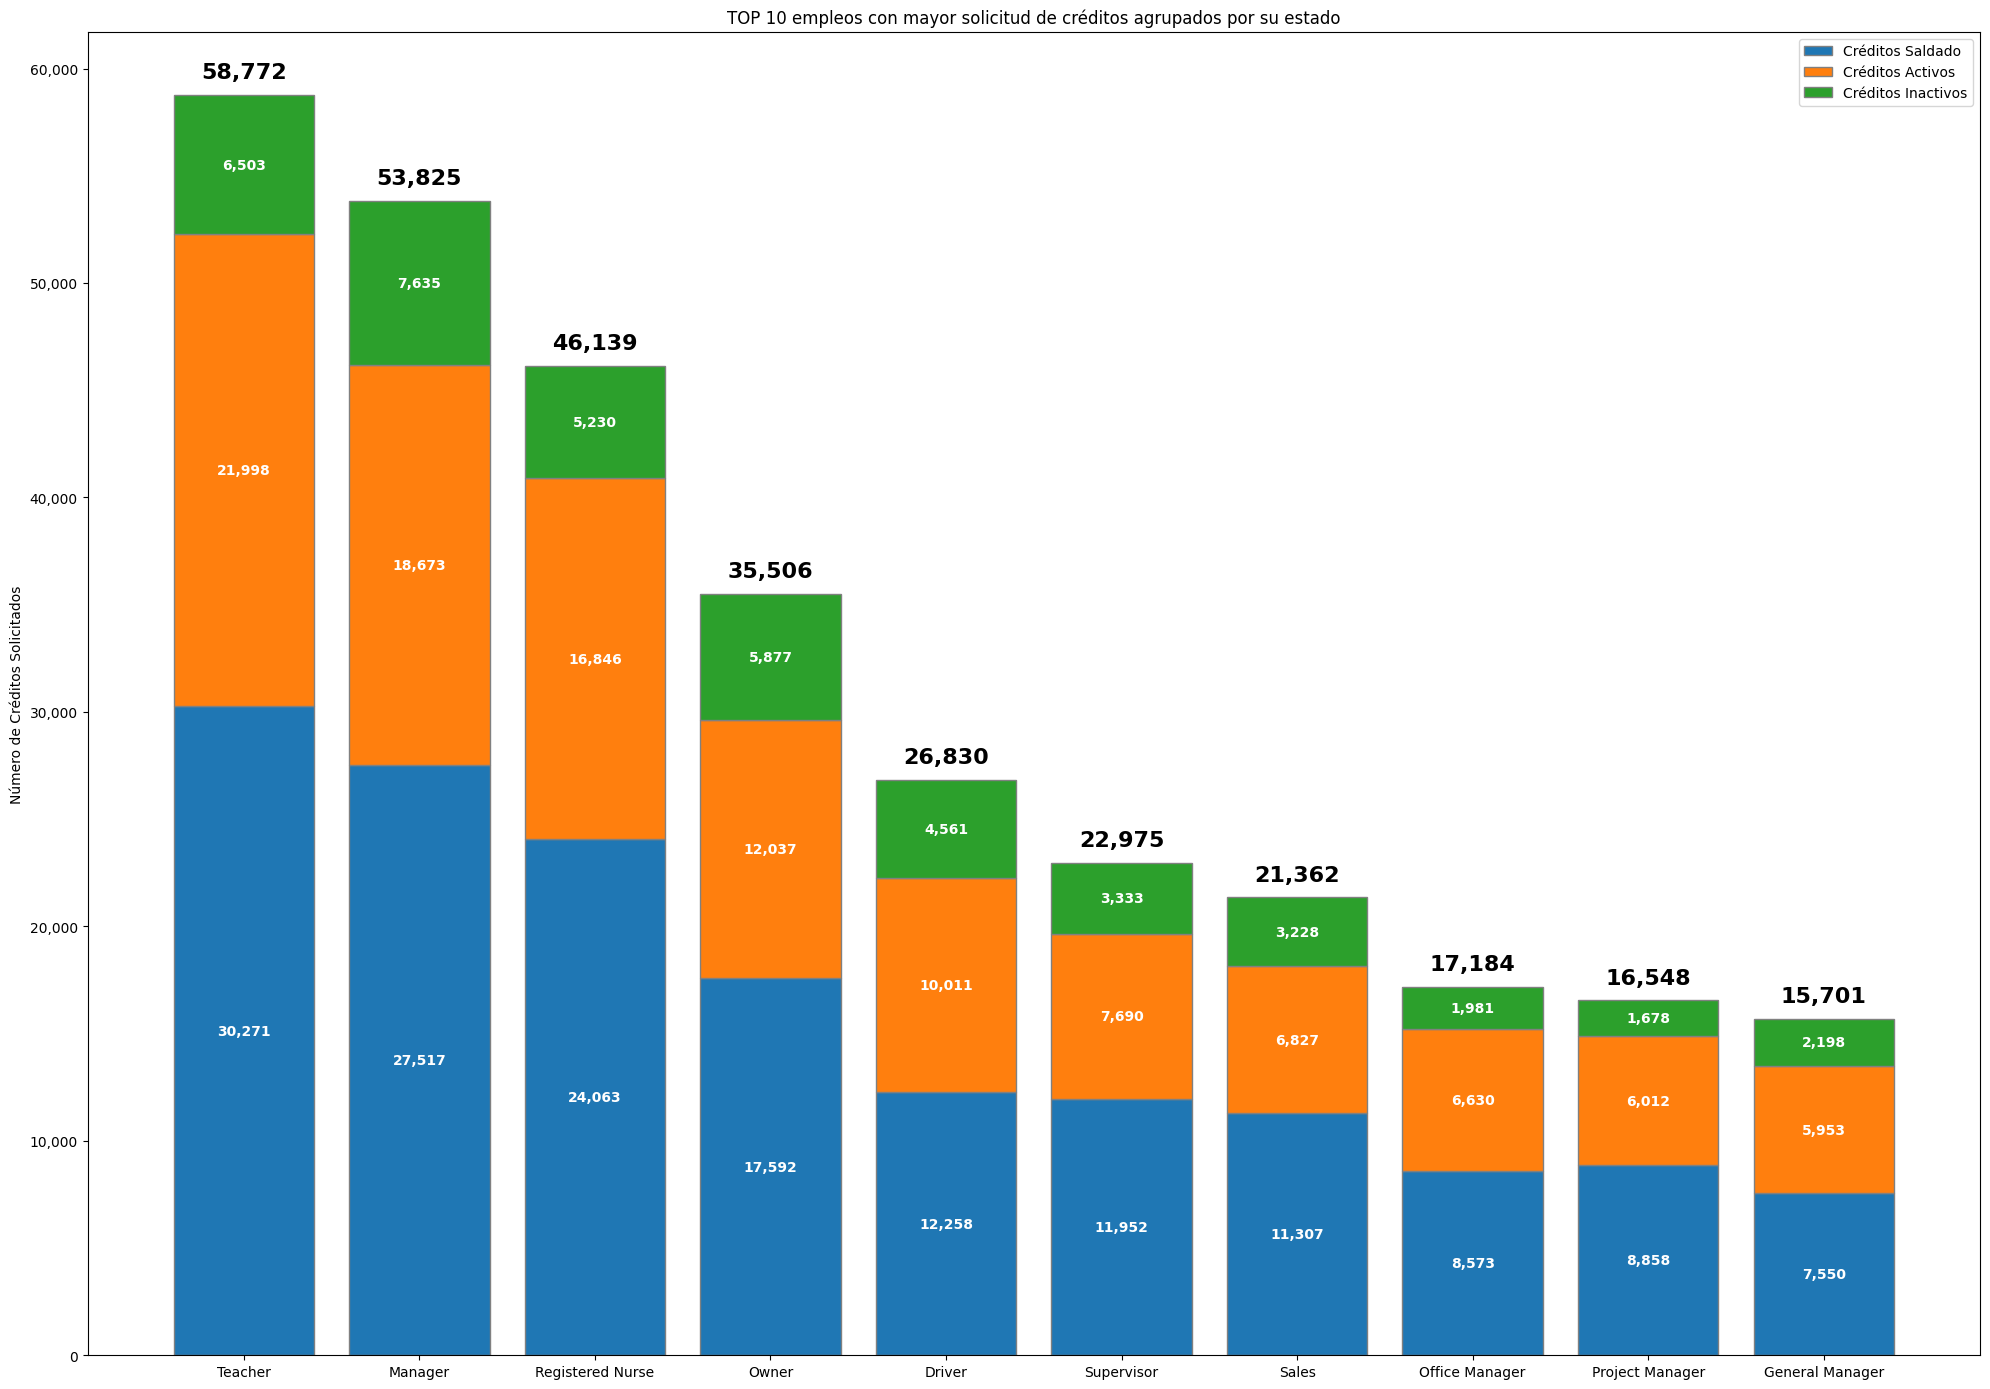

In [68]:
top_10 = tabla_emp.head(10).sort_values('Créditos Totales', ascending=False)

grupos = top_10['emp_title']
valores1 = top_10['Créditos Saldado']
valores2 = top_10['Créditos Activos']
valores3 = top_10['Créditos Inactivos']

fig, ax = plt.subplots(figsize=(20, 14))
plt.title('TOP 10 empleos con mayor solicitud de créditos agrupados por su estado')

ax.bar(grupos, valores1, edgecolor="grey", label='Créditos Saldado')
ax.bar(grupos, valores2, bottom=valores1, edgecolor="grey", label='Créditos Activos')
ax.bar(grupos, valores3, bottom=np.add(valores1, valores2), edgecolor="grey", label='Créditos Inactivos')

# Totales por barra (incluyendo las 3 capas)
total_values = valores1 + valores2 + valores3

for i, total in enumerate(total_values):
    ax.text(
        i,
        total + max(total_values) * 0.01,   # pequeño offset arriba
        f'{total:,.0f}',
        ha='center',
        va='bottom',
        weight='bold',
        color='black',
        size=16
    )

# Etiquetas dentro de cada segmento
for bar in ax.patches:
    h = bar.get_height()
    if h > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + h / 2,
            f'{h:,.0f}',
            ha='center',
            va='center',
            color='w',
            weight='bold',
            size=10
        )



ax.legend(loc='upper right')
ax.set_ylabel('Número de Créditos Solicitados')
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x:,.0f}')
)

plt.tight_layout()
plt.show()


Resulta curioso observar que la mayoría de profesiones que solicitan que han solicitado créditos al grupo Lending Club, son:

* Profesores(as): Con 58,772 créditos emitidos.

* Gerentes: Con 53,825 créditos emitidos, sin consuiderar roles más especificos (como Office Manager, Project Manager o General Manager).

* Enfermeros(as): Con 46,139 créditos emitidos.

* Dueños de negocios: Con 35,506 créditos emitidos.

* Conductores: Con 26,830 créditos emitidos.

Resulta interesante ver que, con excepción de los Gerentes, la mayoría de estos trabajos no alcanzan ingresos anuales de $100,000. lo cual puede ser reflejo de la hipótesis anteriormente mencionado que invita a pensar que con el encarecimiento del costo de vida por efecto inflacionaria, y el bajo ajustes de los sueldos a esta nueva realidad, ha provocado que muchos profesionales requieran necesitar credítos para proyectos de vidas, los cuales serán clasíficados más adelante.

Esto se apoya con el siguiente punto, donde se gráfica en mayor medida los ingresos anuales de los estos 5 empleos:

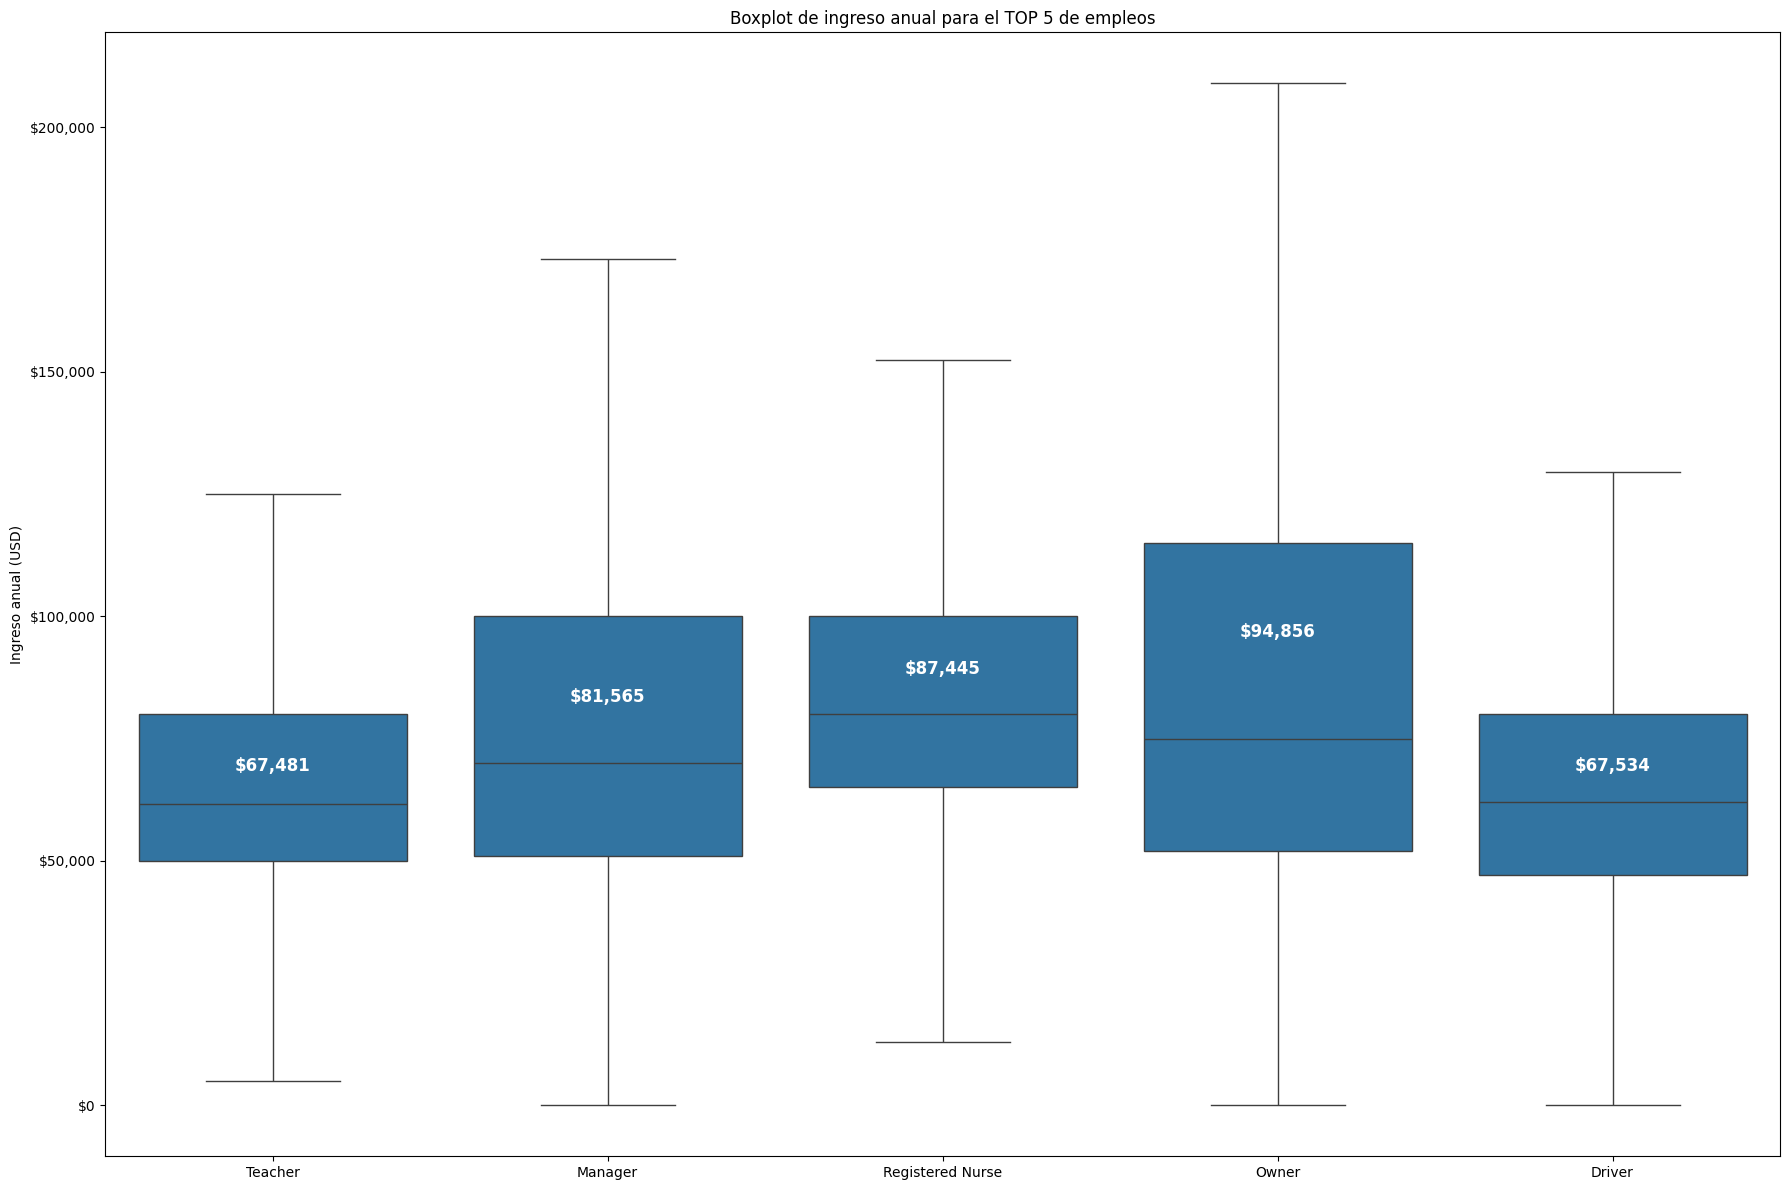

In [ ]:


top_5 = ['Teacher', 'Manager', 'Registered Nurse', 'Owner', 'Driver']

# Preparación de dataframe auxiliar:
dfs = [df_saldado, df_activo, df_inactivo, df_omitido]
df_box = pd.concat(dfs, ignore_index=True)

df_box_top = df_box[df_box['emp_title'].isin(top_5)].copy()

plt.figure(figsize=(18, 12))
ax = sns.boxplot(
    data=df_box_top,
    x='emp_title',
    y='annual_inc',
    order=top_5,
    showfliers=False,
    showmeans=False,
    meanprops={
        "marker": "D",
        "markerfacecolor": "white",
        "markeredgecolor": "black",
        "markersize": 7
    }
)

# Media por empleo (en el mismo orden del boxplot)
means = df_box_top.groupby('emp_title')['annual_inc'].mean().reindex(top_5)

# Etiquetas con el valor de la media
for i, (emp, mean_val) in enumerate(means.items()):
    ax.text(
        i, mean_val, f'${mean_val:,.0f}',
        ha='center', va='bottom', fontsize=12, fontweight='bold', color='white'
    )

plt.title('Boxplot de ingreso anual para el TOP 5 de empleos')
plt.xlabel('')
plt.ylabel('Ingreso anual (USD)')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks()
plt.tight_layout()
plt.show()


### Por nivel de riesgo categorizado por empleo...

In [70]:
df = df_box
df['grade'].unique()


array(['B', 'C', 'A', 'E', 'D', 'F', 'G'], dtype=object)

In [71]:
df['sub_grade'].unique()

array(['B2', 'C5', 'C1', 'B5', 'A4', 'E1', 'C3', 'B1', 'D1', 'C4', 'A1',
       'B3', 'A3', 'A5', 'B4', 'D5', 'D2', 'A2', 'E4', 'D3', 'C2', 'D4',
       'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'F2', 'G3', 'F5', 'G5',
       'G1', 'G2'], dtype=object)

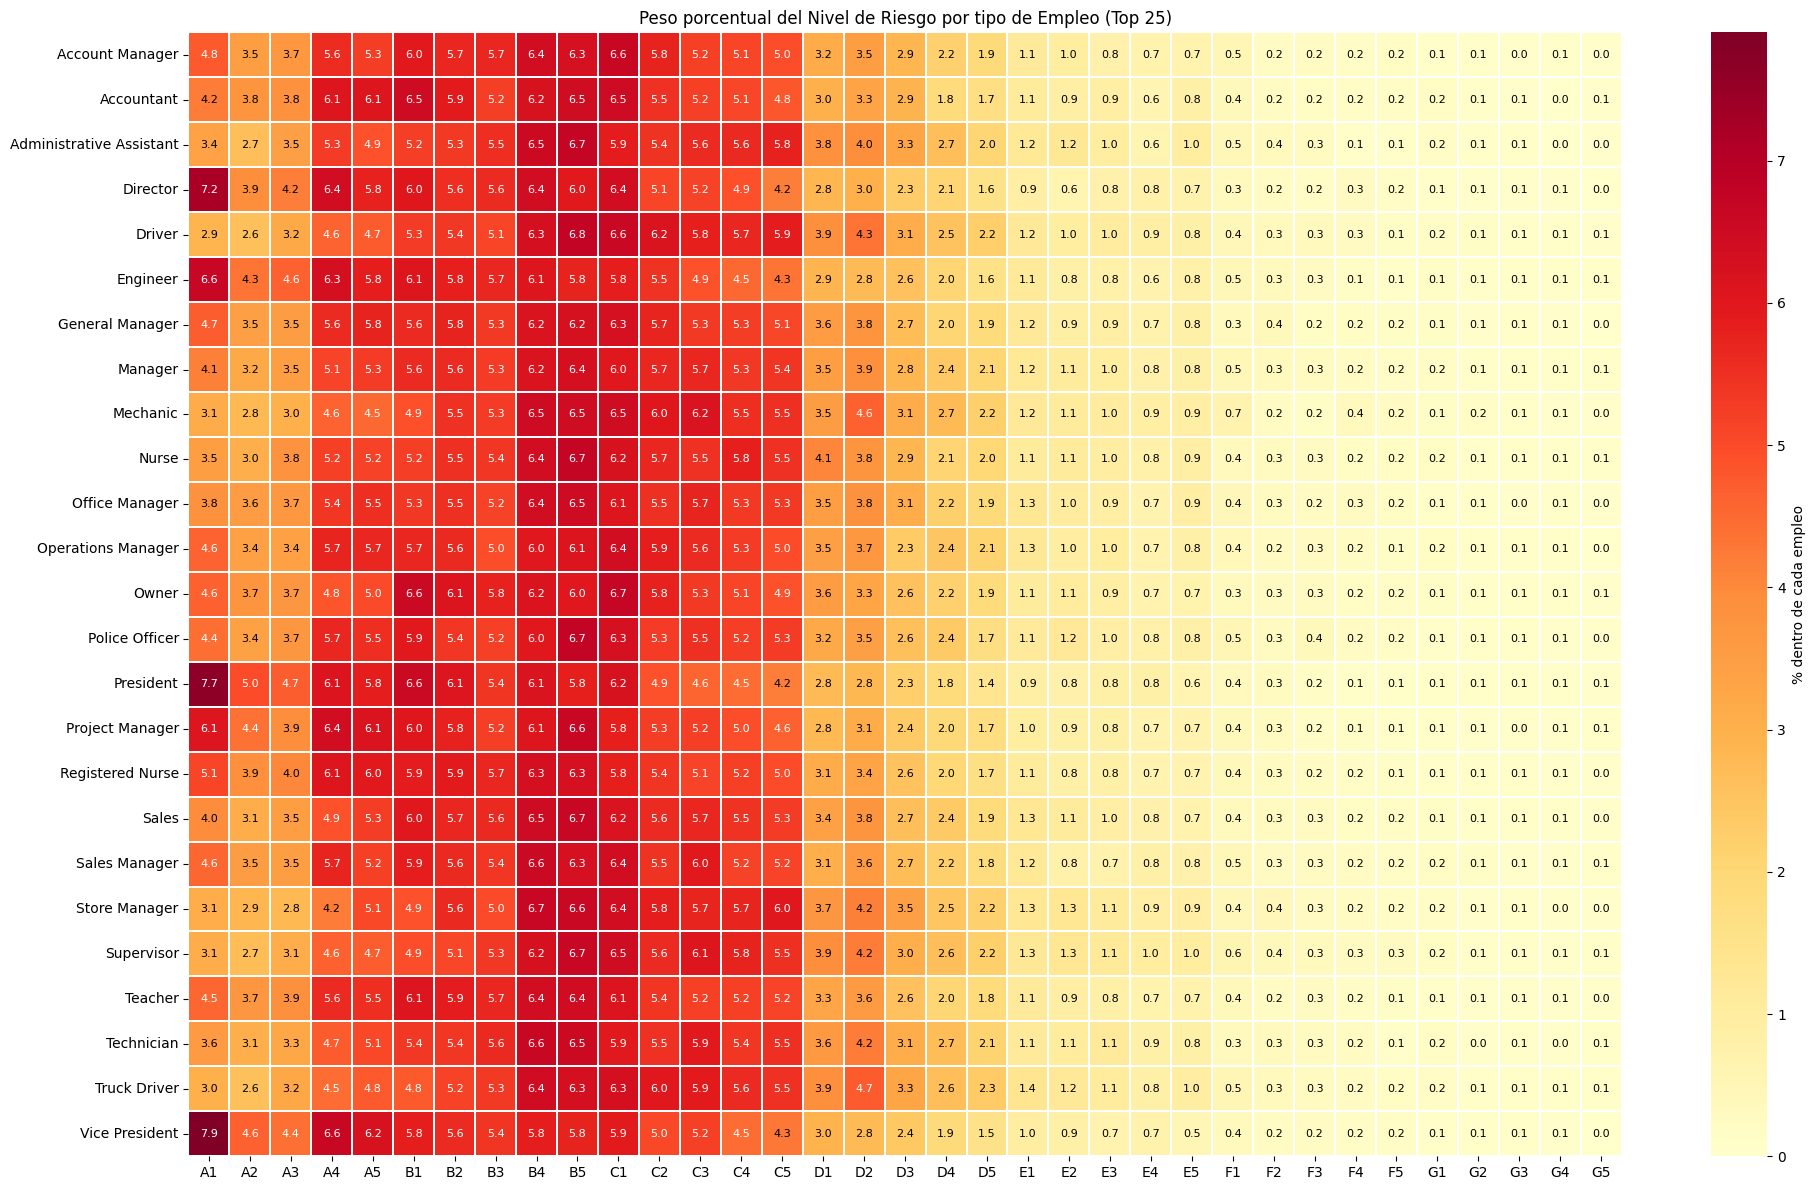

In [78]:
# 1) Base mínima
df_hm = df[['emp_title', 'sub_grade']].dropna().copy()
df_hm['emp_title'] = df_hm['emp_title'].str.strip().str.title()

# 2) Reducir cardinalidad de empleos (top N más frecuentes)
top_n = 25
top_jobs = df_hm['emp_title'].value_counts().head(top_n).index
df_hm = df_hm[df_hm['emp_title'].isin(top_jobs)]

# 3) Tabla de peso porcentual por empleo (cada fila suma 100%)
tabla_pct = pd.crosstab(
    df_hm['emp_title'],
    df_hm['sub_grade'],
    normalize='index'
) * 100

# Orden lógico de sub_grade
orden_sub = [f"{g}{i}" for g in "ABCDEFG" for i in range(1, 6)]
tabla_pct = tabla_pct.reindex(columns=[c for c in orden_sub if c in tabla_pct.columns], fill_value=0)

# 4) Heatmap con valores + contraste automático
plt.figure(figsize=(20, 12))

ax = sns.heatmap(
    tabla_pct,
    cmap='YlOrRd',
    linewidths=0.3,
    linecolor='white',
    cbar_kws={'label': '% dentro de cada empleo'},
    annot=True,
    fmt=".1f",
    annot_kws={"fontsize": 8}
)

# Contraste del texto: blanco en celdas oscuras, negro en celdas claras
norm = ax.collections[0].norm
for txt in ax.texts:
    val = float(txt.get_text())
    txt.set_color('white' if norm(val) > 0.55 else 'black')

plt.title(f'Peso porcentual del Nivel de Riesgo por tipo de Empleo (Top {top_n})')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()



Se observa que la mayoría de los clientes que solicitan créditos, entrán en el grupo de riesgo B (B1, B2, B3, B4, B5). 

Sin embargo, resulta interesante los cargos de Ingenieros, Presidentes y Vicepresidentes, los cuales se puede ver (por subcategoria de riesgo), que el mayor peso poblacional se encuentra en el grupo de riesgo A1 - o sea, el grupo que refleja la menor probabilidad de impago -. Esto se ajusta a una posible narrativa dónde estos cargos, que suelen ir acompañado con mayor poder adquisitivo, suelen considerarse con clientes seguros para Lending Club.

Con este heatmap, se puede definir, por trabajo, estrategias de captación de clientes en el servicio post-venta, con beneficios que puedan servir para retener a estos perfiles de clientes para futuras solicitudes.

### Cantidad de créditos solicitados por el estado de residencia del solicitante...

In [84]:
df['addr_state'].unique()

array(['AZ', 'IL', 'CA', 'OR', 'NC', 'MO', 'CT', 'UT', 'TX', 'FL', 'MN',
       'NY', 'NJ', 'KY', 'OH', 'SC', 'PA', 'RI', 'LA', 'MA', 'WI', 'VA',
       'GA', 'AL', 'WA', 'CO', 'KS', 'NV', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'AK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object)

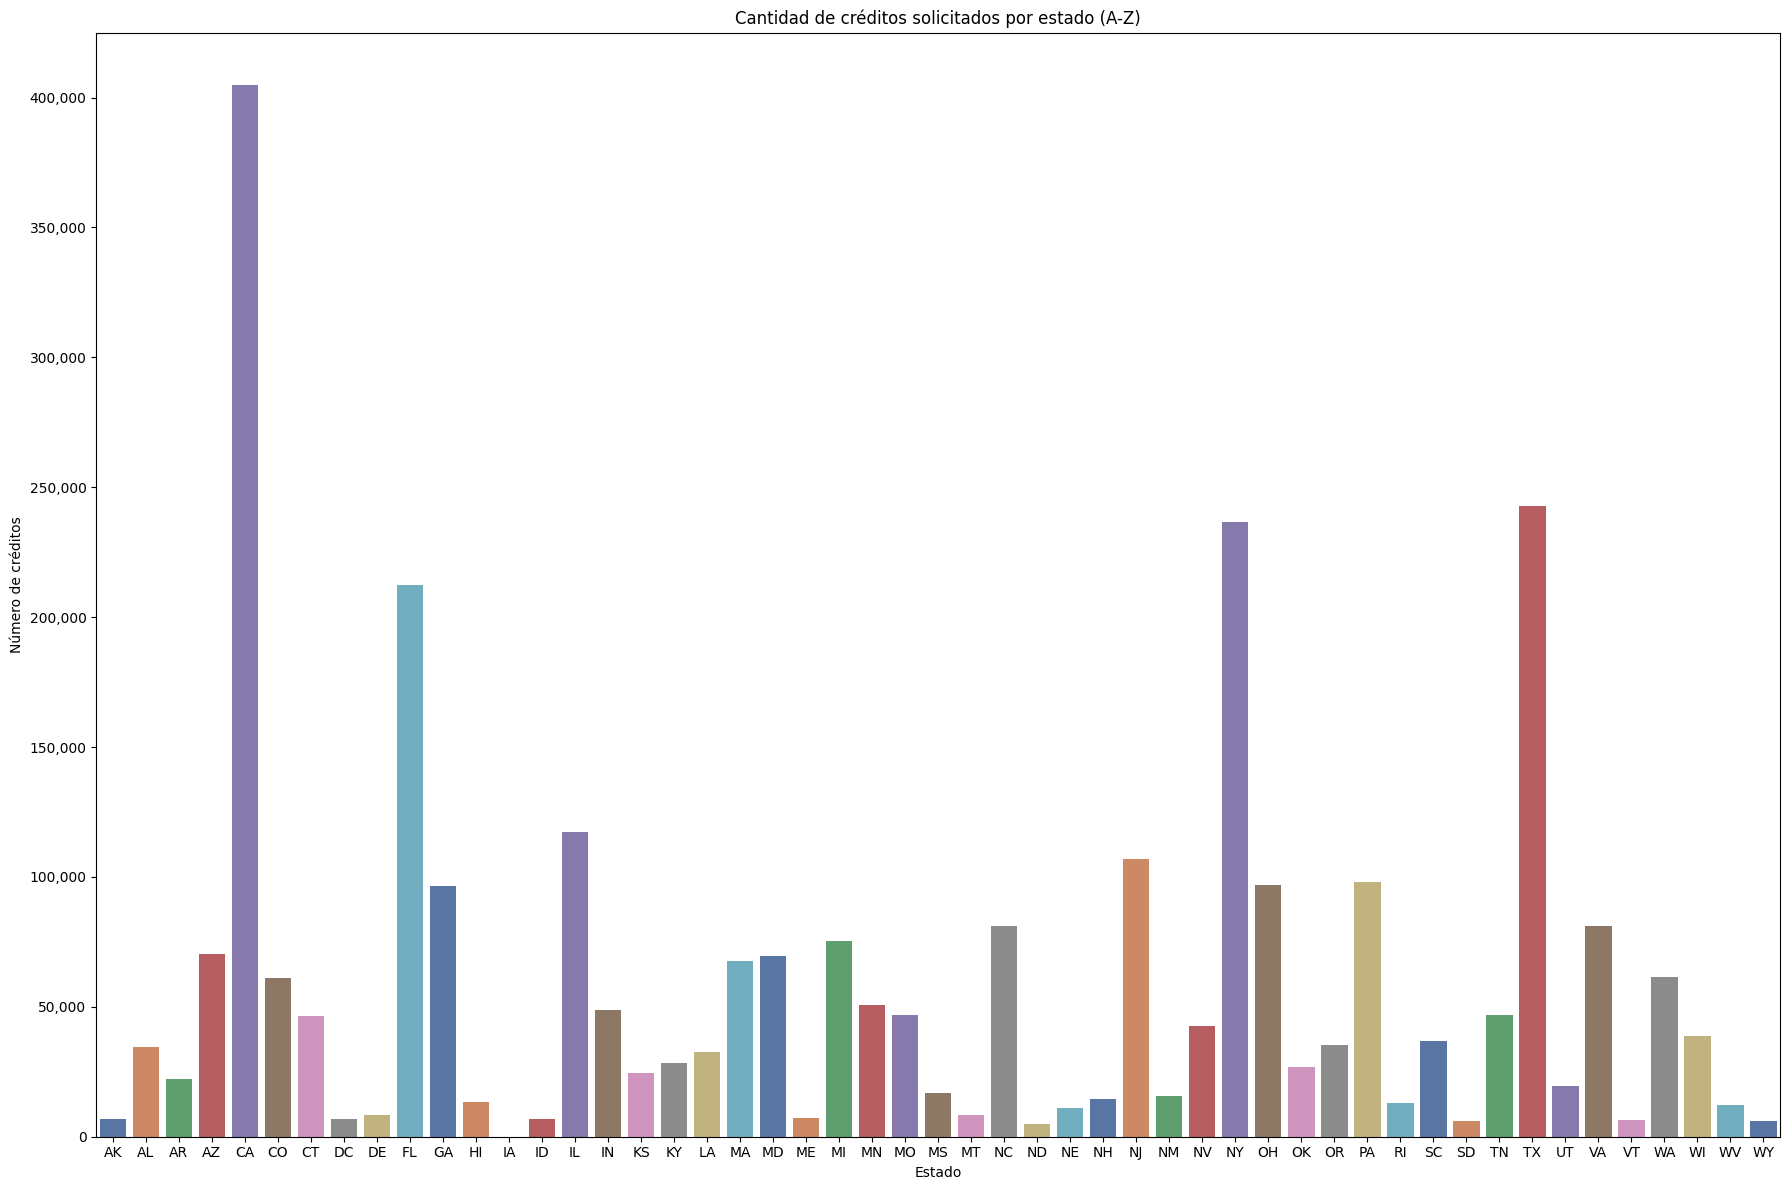

In [100]:
# Conteo de créditos por estado, ordenado alfabéticamente (ascendente)
state_counts = (
    df['addr_state']
    .value_counts()
    .rename_axis('addr_state')
    .reset_index(name='num_creditos')
    .sort_values('addr_state', ascending=True)
)

plt.figure(figsize=(18,12))
ax = sns.barplot(data=state_counts, x='addr_state', y='num_creditos', palette='deep', hue='addr_state', legend=False)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # 1,000 10,000 ...

plt.title('Cantidad de créditos solicitados por estado (A-Z)')
plt.xlabel('Estado')
plt.ylabel('Número de créditos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Lending Club es un compañía prestamista con sede en California, por lo que resulta logíco que la mayoría de sus clientes tengan domicilio en ese estado. Por otro lado, estados como Florida, Nueva York y Texas, representan otro foco de clientes con peso importante para la cartera de Lending Club.

Esto tiene sentido puesto que estos estados suelen ser los motores económicos en Estados Unidos, especialmente Nueva York que es considerado como la capital financiera, y Texas que ha ganado importancia gracias a su importante industria energética.

### Gráfico de torta representando la antiguedad laboral de los solicitantes...

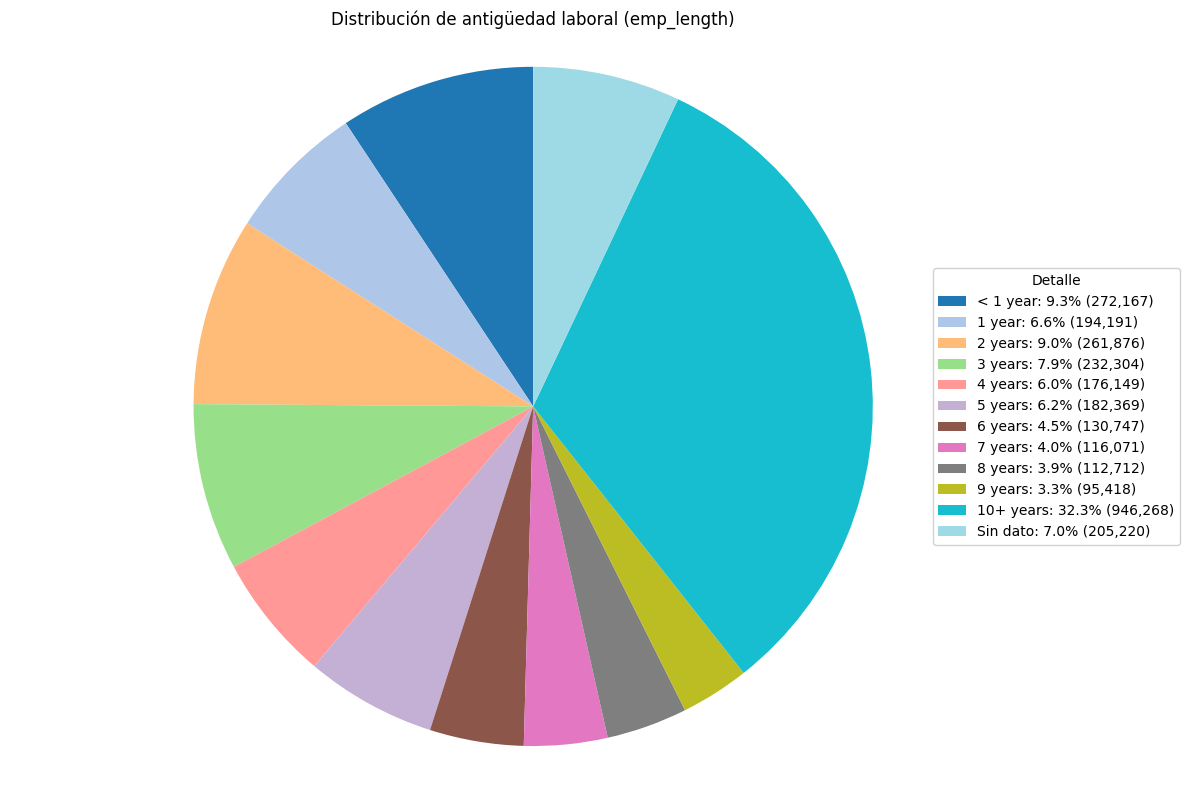

In [110]:
# Torta: distribución de emp_length en df
emp_length_counts = df["emp_length"].value_counts(dropna=False)

# Orden personalizado de menor a mayor (NaN al final como "Sin dato")
orden_emp = [
    "< 1 year", "1 year", "2 years", "3 years", "4 years",
    "5 years", "6 years", "7 years", "8 years", "9 years",
    "10+ years", "Sin dato"
]

# Normalizar valores y convertir NaN a "Sin dato"
emp_series = df["emp_length"].astype("string").fillna("Sin dato").replace({
    "< 1 years": "< 1 year"   # por si aparece con esa variante
})

# Contar y ordenar según el orden definido
emp_length_counts = (
    emp_series.value_counts()
    .reindex(orden_emp, fill_value=0)
)

# Si no quieres mostrar categorías con 0:
emp_length_counts = emp_length_counts[emp_length_counts > 0]


# Opcional: mostrar NaN como texto
emp_length_counts.index = emp_length_counts.index.map(
    lambda x: "Sin dato" if pd.isna(x) else x
)

# Forzar colores
n = len(emp_length_counts)
colors = plt.cm.tab20(np.linspace(0, 1, n))  # 20 colores distintos

fig, ax_emp = plt.subplots(figsize=(12, 8))

if emp_length_counts.empty:
    ax_emp.text(0.5, 0.5, "Sin datos en 'emp_length'",
                ha="center", va="center")
    ax_emp.set_title("Distribución de antigüedad laboral (emp_length)")
    ax_emp.axis("off")
else:
    wedges_emp, _ = ax_emp.pie(
        emp_length_counts.values,
        startangle=90,
        colors=colors
    )
    ax_emp.set_title("Distribución de antigüedad laboral (emp_length)")
    ax_emp.axis("equal")

    total_emp = emp_length_counts.sum()
    legend_labels_emp = [
        f"{label}: {value/total_emp:.1%} ({value:,})"
        for label, value in emp_length_counts.items()
    ]

    ax_emp.legend(
        wedges_emp,
        legend_labels_emp,
        title="Detalle",
        loc="center",
        bbox_to_anchor=(1.0, 0.5),
        frameon=True,
        fancybox=True,
        framealpha=0.9
    )

plt.tight_layout()
plt.show()


Por antiguedad laboral, se puede apreciar que la mayoria de los créditos solicitados los solicitan personas que llevan un mínimo de 10 años en el cargo. Esta observación juega con la hipótesis que explica el mótivo de la creciente cantidad de dinero solicitada por prestamo, y los perfiles profesionales que suelen solicitarlos apoyados por sus ingresos anuales.

### Propósito de los creditos solicitados...

In [80]:
lista_purpose = sorted(df['purpose'].dropna().unique().tolist())
lista_purpose

['car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding']

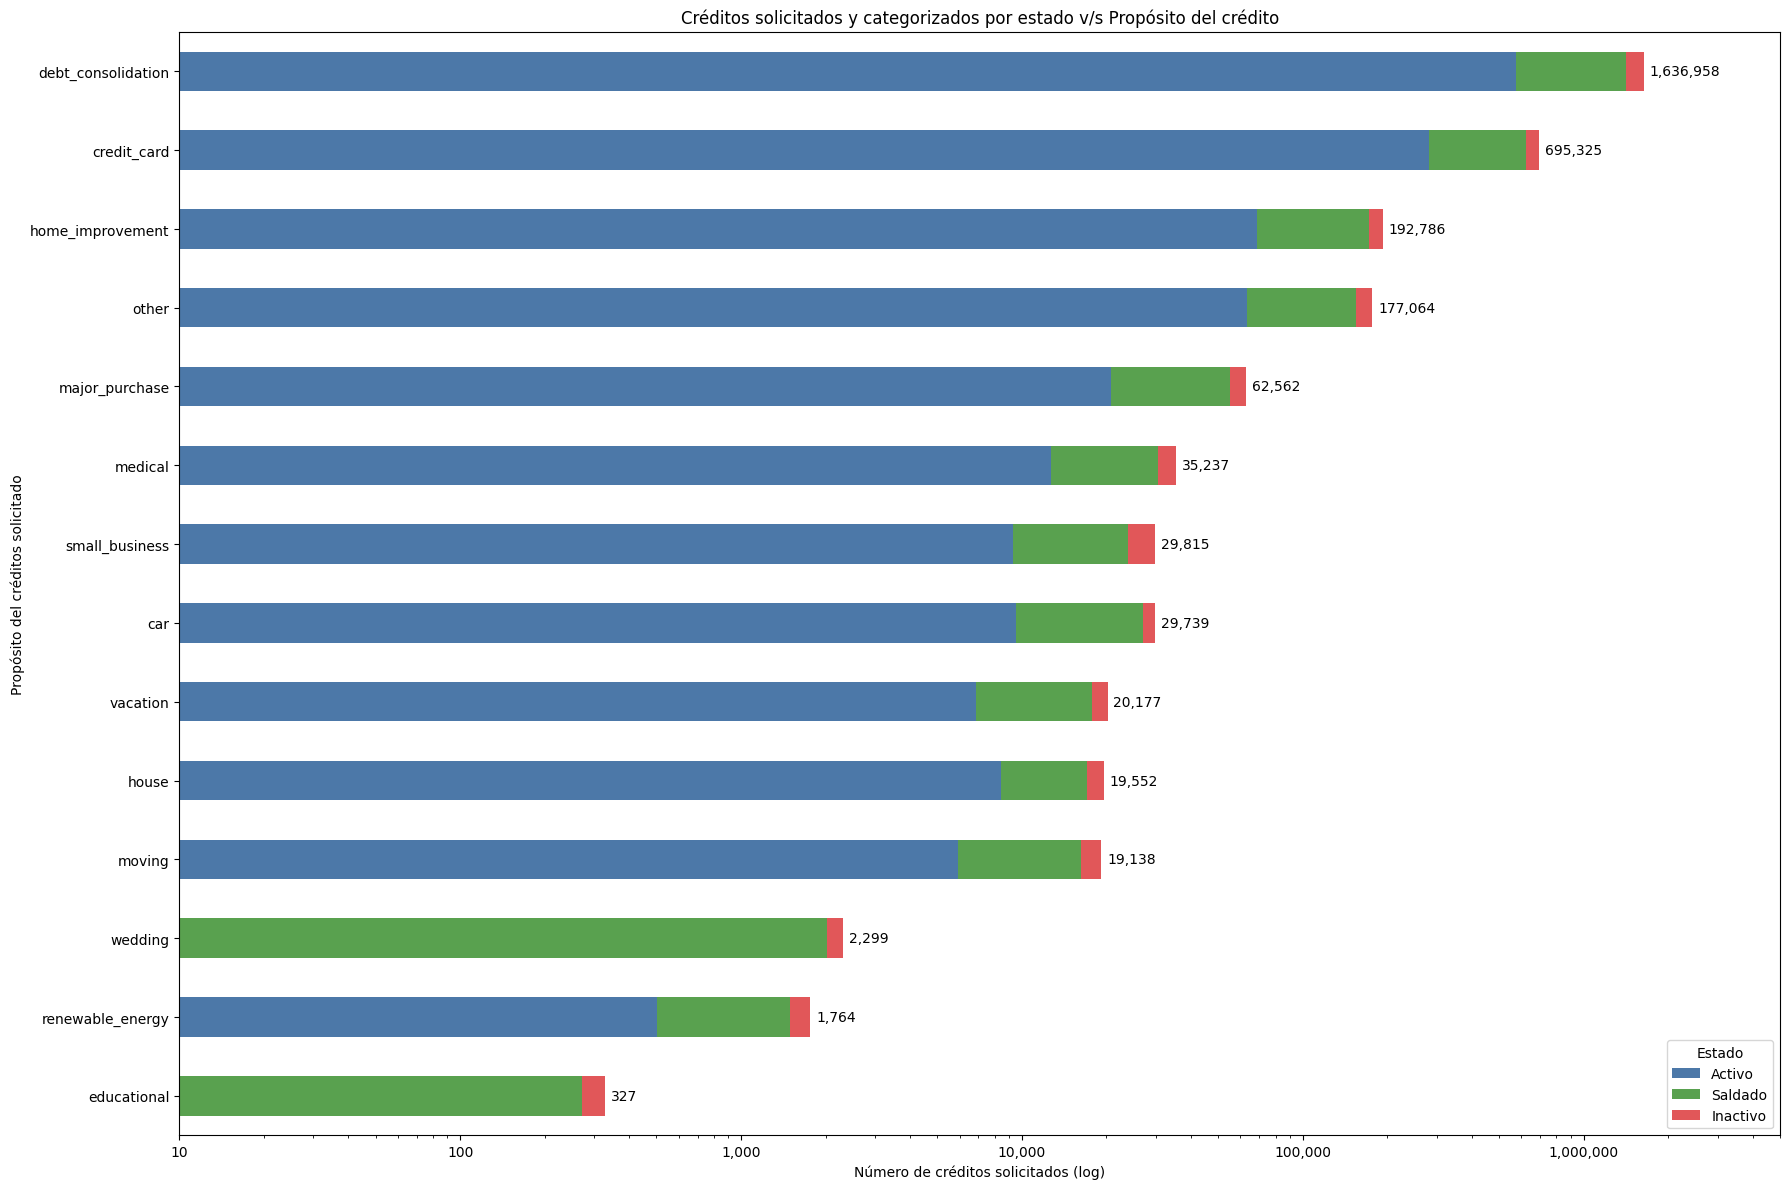

In [82]:
# Conteos por purpose en cada dataframe
c_activo = df_activo['purpose'].value_counts()
c_saldado = df_saldado['purpose'].value_counts()
c_inactivo = df_inactivo['purpose'].value_counts()

# Tabla apilada
tabla_stack = pd.concat([c_activo, c_saldado, c_inactivo], axis=1).fillna(0)
tabla_stack.columns = ['Activo', 'Saldado', 'Inactivo']

# Filtrar por lista_purpose y ordenar de mayor a menor
tabla_stack = tabla_stack.reindex(lista_purpose).fillna(0)
tabla_stack['Total'] = tabla_stack.sum(axis=1)
tabla_stack = tabla_stack[tabla_stack['Total'] > 0].sort_values('Total', ascending=False)

# Graficar
ax = tabla_stack[['Activo', 'Saldado', 'Inactivo']].plot(
    kind='barh',
    stacked=True,
    figsize=(18, 12),
    color=['#4C78A8', '#59A14F', '#E15759']
)

# Escala logarítmica
ax.set_xscale('log')

# Línea para modificar el rango del eje X (edita estos valores)
ax.set_xlim(10, 5_000_000)

# Etiquetas con solicitudes totales al lado de cada barra
for i, total in enumerate(tabla_stack['Total'].values):
    ax.text(
        total * 1.05, i, f'{total:,.0f}',
        va='center', ha='left', fontsize=10, color='black'
    )

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Créditos solicitados y categorizados por estado v/s Propósito del crédito')
plt.xlabel('Número de créditos solicitados (log)')
plt.ylabel('Propósito del créditos solicitado')
plt.legend(title='Estado', loc='lower right')
ax.invert_yaxis()  # mayor a menor de arriba hacia abajo
plt.tight_layout()
plt.show()

De aquí, podemos extraer los mótivos por el cual se solicitarón los créditos emitidos. Es interesante observar que la mayoría de estos créditos se suelen solicitar para liquidar o saldar deudas ya existentes, seguidos por mejoras o reformas en hogares. 

También resulta interesante ver los créditos emitidos para eventos específicos como son los Matrimonios, y para costear Educación, donde la mayoria de estos créditos ya se encuentran saldados, con un porcentaje minímo de créditos en mora.